In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import tensorflow as tf
print(tf.__version__)

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

2.2.0


### Group parameters for train and test data generators

In [2]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, 
                                                             zoom_range=0.2,
                                                             rescale=1./225)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)

train_data = train_datagen.flow_from_directory('../data/chest_xray/train/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
val_data = val_datagen.flow_from_directory('../data/chest_xray/val/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
test_data = test_datagen.flow_from_directory('../data/chest_xray/test//',
                                             target_size=(100,100),
                                             batch_size=32,
                                             class_mode='binary',
                                             color_mode='grayscale')

Found 4682 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

In [4]:
steps_per_epoch = len(train_data)

In [5]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(100,100,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=85, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

history = model.fit(train_data, epochs=60, validation_data=(val_data), steps_per_epoch=steps_per_epoch, validation_steps=len(val_data))

Epoch 1/60
147/147 [==============================] - 136s 928ms/step - loss: 0.4144 - accuracy: 0.8419 - precision: 0.8679 - recall: 0.9331 - val_loss: 0.2833 - val_accuracy: 0.8745 - val_precision: 0.8509 - val_recall: 0.9678
Epoch 2/60
147/147 [==============================] - 157s 1s/step - loss: 0.2272 - accuracy: 0.9056 - precision: 0.9289 - recall: 0.9478 - val_loss: 0.2335 - val_accuracy: 0.9036 - val_precision: 0.9802 - val_recall: 0.8634
Epoch 3/60
147/147 [==============================] - 162s 1s/step - loss: 0.1841 - accuracy: 0.9267 - precision: 0.9439 - recall: 0.9602 - val_loss: 0.2029 - val_accuracy: 0.9309 - val_precision: 0.9427 - val_recall: 0.9481
Epoch 4/60
147/147 [==============================] - 154s 1s/step - loss: 0.1735 - accuracy: 0.9323 - precision: 0.9493 - recall: 0.9619 - val_loss: 0.2073 - val_accuracy: 0.9255 - val_precision: 0.9810 - val_recall: 0.8983
Epoch 5/60
147/147 [==============================] - 142s 966ms/step - loss: 0.1714 - accuracy: 

In [6]:
acc = model.evaluate(test_data, steps=len(test_data), verbose=1)
list(zip(model.metrics_names, acc))

20/20 [==============================] - 14s 704ms/step - loss: 0.7251 - accuracy: 0.8990 - precision: 0.8691 - recall: 0.9872


[('loss', 0.7251406311988831),
 ('accuracy', 0.8990384340286255),
 ('precision', 0.8690744638442993),
 ('recall', 0.9871794581413269)]

In [7]:
first_batch = test_data.next()
data_list = first_batch[0]
batch_index = 0
class_list = first_batch[1]
while batch_index <= test_data.batch_index:
    data = test_data.next()
    print(data[0].shape)
    data_list=np.concatenate((data_list, data[0]))
    class_list=np.concatenate((class_list, data[1]))
    batch_index = batch_index + 1
data_array = np.asarray(data_list)
data_array.shape

(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(16, 100, 100, 1)


(592, 100, 100, 1)

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat, target_names=['NORMAL', 'PNEUMONIA']))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

In [9]:
preds = model.predict_classes(data_array)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

      NORMAL       0.98      0.76      0.85       222
   PNEUMONIA       0.87      0.99      0.93       370

    accuracy                           0.90       592
   macro avg       0.92      0.87      0.89       592
weighted avg       0.91      0.90      0.90       592

Accurancy:  0.902027027027027


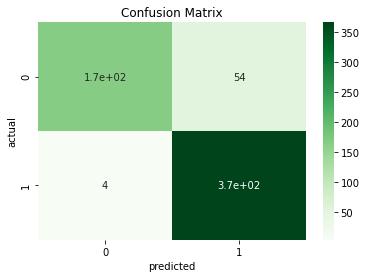

In [10]:
evaluation(class_list, preds)

In [11]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [22]:
history.history

{'loss': [0.4144463539123535,
  0.227176234126091,
  0.1841403841972351,
  0.1735495626926422,
  0.1714281439781189,
  0.16075438261032104,
  0.1500907689332962,
  0.15098737180233002,
  0.14091110229492188,
  0.14227326214313507,
  0.14247941970825195,
  0.13828285038471222,
  0.13625729084014893,
  0.132772758603096,
  0.13406561315059662,
  0.12966443598270416,
  0.12756453454494476,
  0.12591399252414703,
  0.13171088695526123,
  0.12559302151203156,
  0.11744239181280136,
  0.11744280904531479,
  0.11418382078409195,
  0.10041375458240509,
  0.11818753927946091,
  0.11389391124248505,
  0.09943843632936478,
  0.10047564655542374,
  0.1014237180352211,
  0.11009349673986435,
  0.10340212285518646,
  0.09467578679323196,
  0.09796508401632309,
  0.08809074014425278,
  0.0970141589641571,
  0.09178508073091507,
  0.09316900372505188,
  0.08956121653318405,
  0.09689586609601974,
  0.08516901731491089,
  0.08663268387317657,
  0.09767672419548035,
  0.08745657652616501,
  0.0792696401

In [13]:
import pickle

In [15]:
pickle.dump(history, open('history.pkl', 'wb'))

TypeError: cannot pickle '_thread.RLock' object

In [16]:
type(history)

tensorflow.python.keras.callbacks.History

In [17]:
history

In [23]:
pickle.dump({'val':[val_accuracy, val_loss], 'train':[accuracy, loss]}, open('history.pkl', 'wb'))

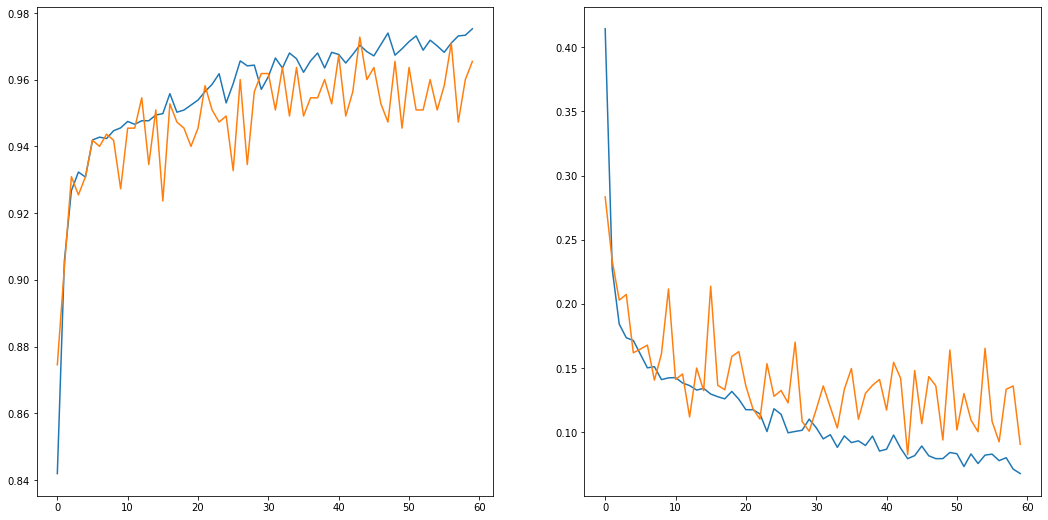

In [12]:
fig, ax = plt.subplots(1,2, figsize=(18,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax[0])
sns.lineplot(range(len(loss)), loss, ax=ax[1])

sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax[0])
sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])